In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

In [2]:
df = pd.read_csv(r"C:\Users\ambou\Machine-Learning\FINAL-TF2-FILES\TF_2_Notebooks_and_Data\DATA\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


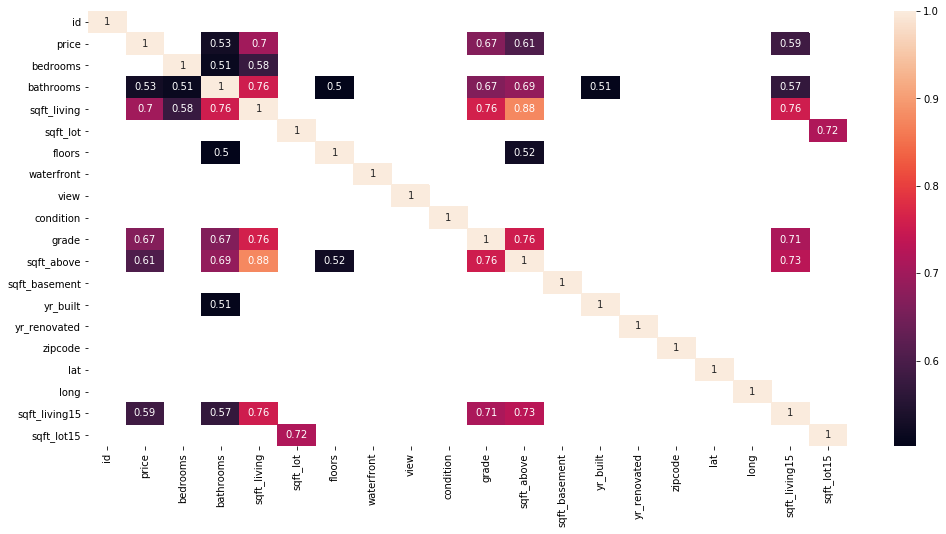

In [3]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr()[df.corr()>0.5], annot=True)

In [4]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [5]:
df["bedrooms"].replace([7,8,9,10,11,33],np.NAN,inplace=True) # Getting rid of outliers to enhance performance
df.dropna(inplace=True)

In [6]:
df["bedrooms"].value_counts()

3.0    9824
4.0    6882
2.0    2760
5.0    1601
6.0     272
1.0     196
Name: bedrooms, dtype: int64

In [63]:
# Define X and y
X = df[["bedrooms","bathrooms","sqft_living","grade","sqft_above","sqft_living15"]].values
y = (df["price"] / 1000).values # Divide y by 1000 because prices are listed as 229,000 or 450000 etc.

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
num_dense_layers = 3
num_nodes = 64

model = Sequential(Dense(6, activation="relu")) # Input layer. (6 nodes because the shape of one data point is (6,))
for layer in range(num_dense_layers):
    model.add(Dense(num_nodes, activation="relu"))

model.add(Dropout(0.2))# Dropout layer to reduce overfitting
model.add(Dense(1)) # Final output layer

model.compile(optimizer="adam",loss="mse")

In [79]:
H = model.fit(X_train, y_train, batch_size=200, epochs=50, validation_split=0.3, verbose=0)

In [80]:
error = model.evaluate(X_train, y_train,verbose=0)
error

65423.47321961656

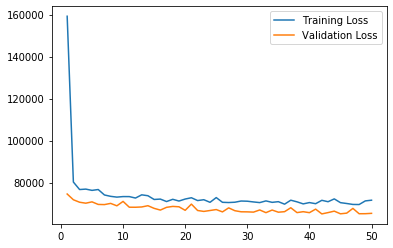

In [81]:
loss = H.history["loss"]
val_loss = H.history["val_loss"]
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.legend()